In [90]:
#load "/Users/administrator/dotfiles/fsharp/Utils.fsx"

open DatabaseUtils
open Unix
open MySql.Data.MySqlClient
open System

let mysqlDatabase : Result<MySqlConnection, string> =
  Ok "Host=localhost;Database=post_v_course;User=root"
  |> connectToMysqlDatabase

let displayImage base64String =
    display(HTML(base64ToHtmlImg base64String))

let displayQuery query = 
  mysqlDatabase
      |> executeMysqlQuery query
      |> readMysqlResults
      |> convertToHtml
      |> function 
          | Ok html -> display(HTML html)
          | Error e -> display(e)

let displayPltQuery query plt =
  mysqlDatabase
      |> executeMysqlQuery query
      |> readMysqlResults
      |> convertToCsv
      |> zsh $"plt '{plt}' | base64"
      |> function
          | Ok base64Img -> displayImage base64Img
          | Error e -> display(e)

In [2]:
Ok "pattern
    runner
    batter"
    |> grep "tt"
    |> awk """'{print $1 " " $1 " " $1}'"""
    |> echo

pattern pattern pattern
batter batter batter
  




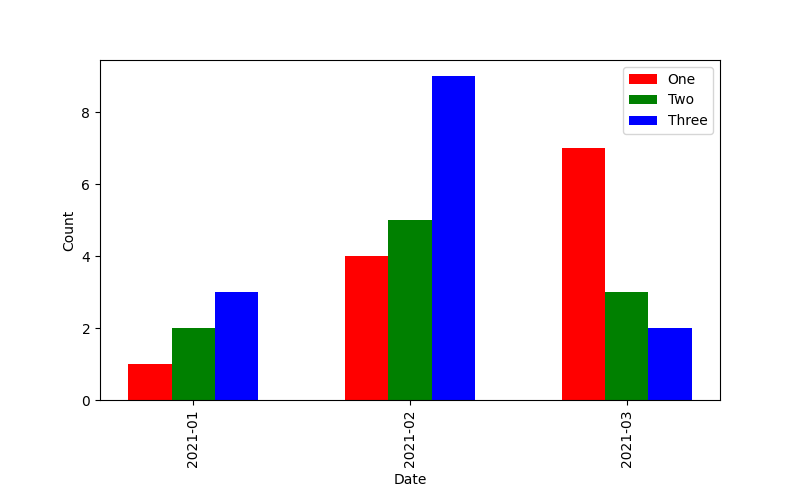

In [3]:
Ok "one,two,three,date
    1,2,3,2021-01
    4,5,9,2021-02
    7,3,2,2021-03"
    |> zsh 
        "plt '[one, two, three], date { 
            bar 10px [solid red, solid green, solid blue] 
        }' | base64"
    |> function
        | Ok base64Img -> displayImage base64Img
        | Error e -> display(e)

In [9]:
let array = [10; 2; 3]

let num = 
  array
    |> List.map Some 
    |> List.tryFind Option.isSome
    
match num with
| Some(Some n) -> printfn "Found %d" n
| Some (None)
| None -> printfn "None"

Found 10


In [28]:
type Person = { Name: string; Age: int }

type PersonBuilder() =
    member __.Yield(_) = { Name = ""; Age = -1 }  // Initial state with default values

    [<CustomOperation("set_name")>]
    member __.SetName(state: Person, name: string) : Person =
        { state with Name = name }

    [<CustomOperation("set_age")>]
    member __.SetAge(state: Person, age: int) : Person =
        { state with Age = age }

    // Bind allows chaining operations with potential state transformations.
    member __.Bind(state: Person, f) =
        f(state)

    // Run returns the final, possibly validated, result.
    member __.Run(state: Person) =
        if state.Name = "" then Error "Name is required"
        else if state.Age < 0 || state.Age > 150 then Error "Invalid age"
        else Ok(state)


let person = PersonBuilder()

let steve = person {
    set_name "Steve"
    set_age 30
}

match steve with
| Ok p -> printfn "Name: %s - Age: %d" p.Name p.Age
| Error e -> printfn "Error: %s" e

Name: Steve - Age: 30


In [89]:
let isCheckedOut = true
let isAvailable = true

let query = queryBuilder {
    select ["title"; "author"]
    from "books"
    where [
        if isCheckedOut then "checked_out = 1" else ""
        if isAvailable then "available = 1" else ""
    ]
    join "INNER" "authors" "books.author_id = authors.id"
    group_by ["author"]
    order_by ["author"]
}

printfn "%s" query


SELECT 
  title,
  author 
FROM books 
INNER JOIN authors 
ON books.author_id = authors.id
WHERE checked_out = 1
AND available = 1
GROUP BY author
ORDER BY author;
